In [ ]:
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
(xtrain,_),(_,_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain = xtrain.reshape((*xtrain.shape,1))

In [ ]:
print(xtrain.shape)

(60000, 28, 28, 1)


## **Normalize the data**

In [ ]:
xtrain = (xtrain.astype('float32')-127.5)/127.5

In [ ]:
total_epoch = 50
batch_size = 256
no_of_batches = int(xtrain.shape[0]/batch_size)
half_batch = 128
noise_dim = 100
adam = Adam(lr=2e-4,beta_1=0.5)

In [ ]:
### lets define our generator 
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(noise_dim,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

## Double the activation size
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())


generator.add(UpSampling2D())
generator.add(Conv2D(1,kernel_size=(5,5),padding='same',activation='tanh'))


generator.compile(loss='binary_crossentropy',optimizer ='adam')
generator.summary()

## lets define our discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),padding='same',strides=(2,2),input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Conv2D(128,(5,5),padding='same',strides=(2,2)))

## Flatten
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')
discriminator.summary()





Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)       

In [ ]:
## implementating GAN
discriminator.trainable =False
gan_input = Input(shape=(noise_dim,))
gen_img = generator(gan_input)
gan_output = discriminator(gen_img)

### using functional api
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [ ]:
xtrain.shape

(60000, 28, 28, 1)

In [ ]:
import os
os.mkdir('images')
os.mkdir('models')

## **Let's Train Our Model**

In [ ]:
def save_imgs(epoch,samples=100):
    
    noise = np.random.normal(0,1,size=(samples,noise_dim))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 Disc Loss 0.3486 Generator Loss 2.0431
Epoch 2 Disc Loss 0.6013 Generator Loss 2.0327
Epoch 3 Disc Loss 0.5980 Generator Loss 1.9579
Epoch 4 Disc Loss 0.6018 Generator Loss 1.4505
Epoch 5 Disc Loss 0.5929 Generator Loss 1.4554


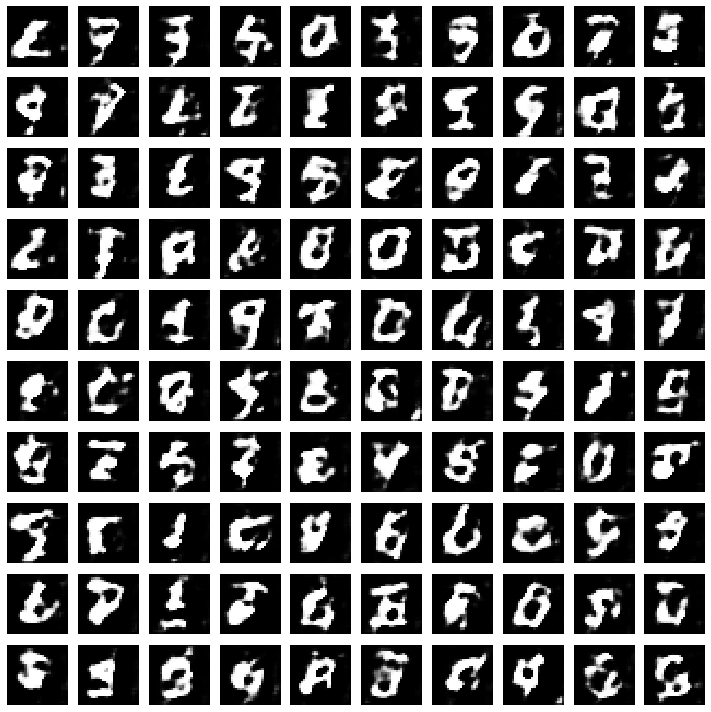

Epoch 6 Disc Loss 0.6669 Generator Loss 1.3277
Epoch 7 Disc Loss 0.6312 Generator Loss 1.2582
Epoch 8 Disc Loss 0.6358 Generator Loss 1.2144
Epoch 9 Disc Loss 0.6216 Generator Loss 1.2942
Epoch 10 Disc Loss 0.6356 Generator Loss 1.2554


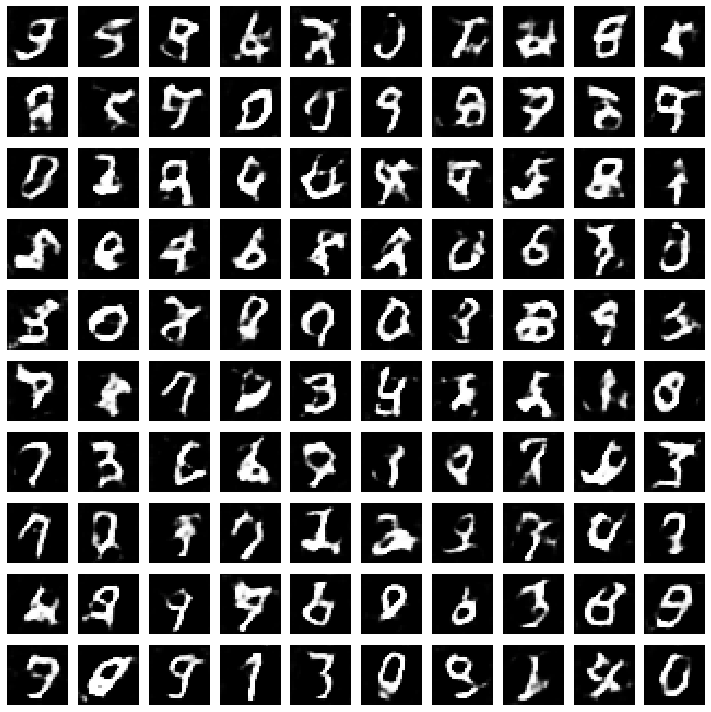

Epoch 11 Disc Loss 0.6438 Generator Loss 1.2686
Epoch 12 Disc Loss 0.6409 Generator Loss 1.1617
Epoch 13 Disc Loss 0.6454 Generator Loss 1.1534
Epoch 14 Disc Loss 0.6482 Generator Loss 1.1865
Epoch 15 Disc Loss 0.6456 Generator Loss 1.1372


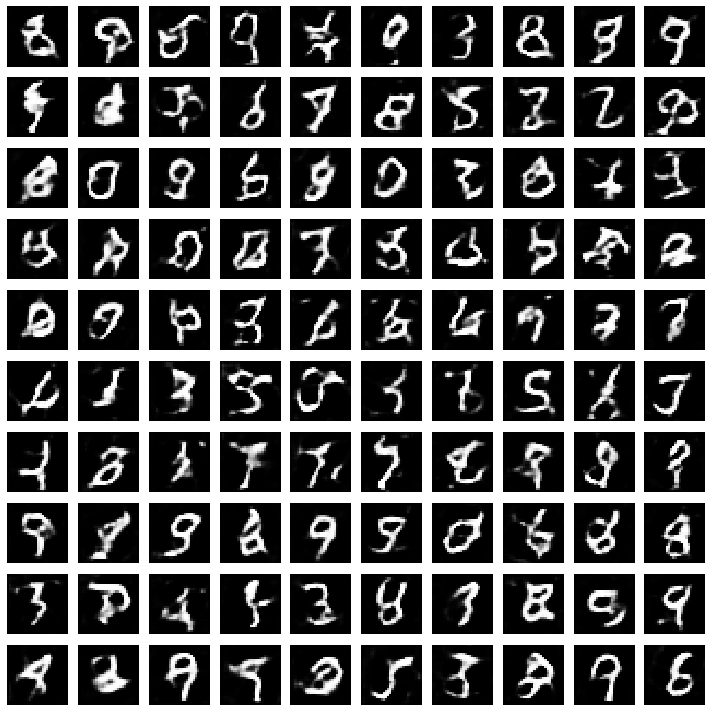

Epoch 16 Disc Loss 0.6421 Generator Loss 1.2048
Epoch 17 Disc Loss 0.6402 Generator Loss 1.1194
Epoch 18 Disc Loss 0.6455 Generator Loss 1.1559
Epoch 19 Disc Loss 0.6383 Generator Loss 1.1343
Epoch 20 Disc Loss 0.6527 Generator Loss 1.1320


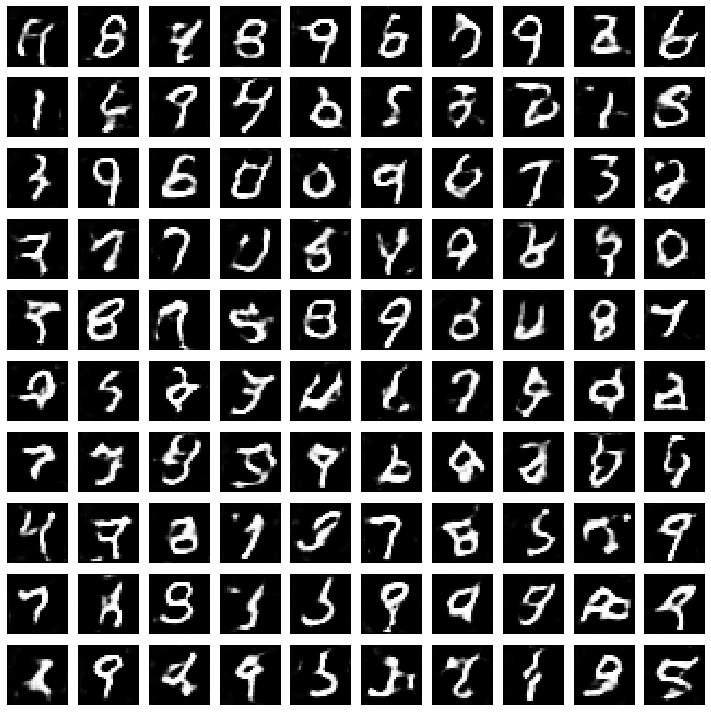

Epoch 21 Disc Loss 0.6405 Generator Loss 1.1128
Epoch 22 Disc Loss 0.6738 Generator Loss 1.2510
Epoch 23 Disc Loss 0.6569 Generator Loss 1.0765
Epoch 24 Disc Loss 0.6328 Generator Loss 1.1080
Epoch 25 Disc Loss 0.6382 Generator Loss 1.1516


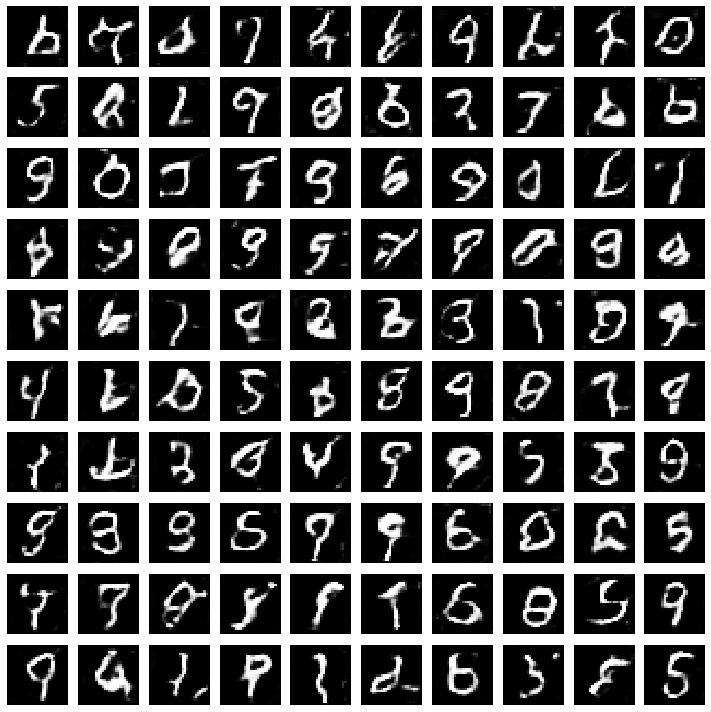

Epoch 26 Disc Loss 0.6468 Generator Loss 1.1756
Epoch 27 Disc Loss 0.6933 Generator Loss 1.1410
Epoch 28 Disc Loss 0.6287 Generator Loss 1.1106
Epoch 29 Disc Loss 0.6402 Generator Loss 1.1061
Epoch 30 Disc Loss 0.7234 Generator Loss 1.2034


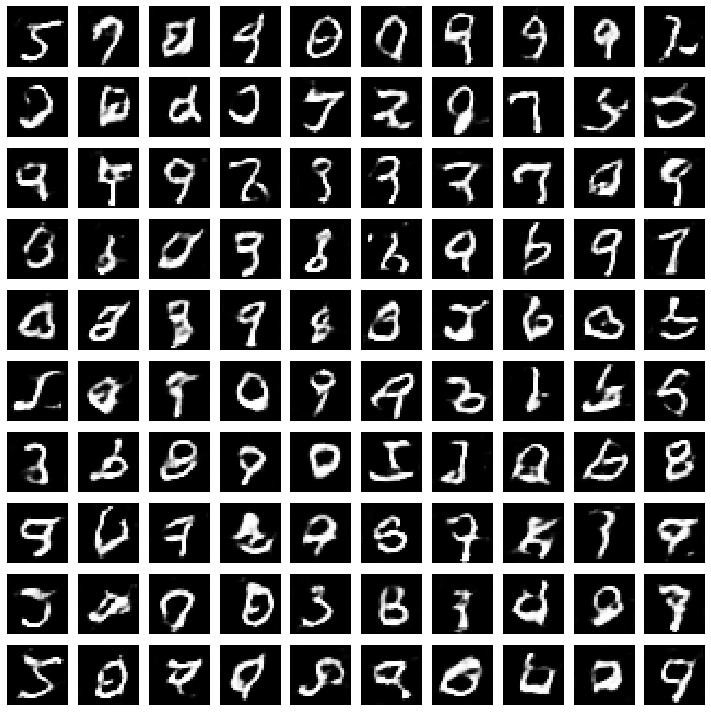

Epoch 31 Disc Loss 0.6572 Generator Loss 1.1000
Epoch 32 Disc Loss 0.6486 Generator Loss 1.0238
Epoch 33 Disc Loss 0.6310 Generator Loss 1.1242
Epoch 34 Disc Loss 0.6504 Generator Loss 1.1113
Epoch 35 Disc Loss 0.6833 Generator Loss 1.1331


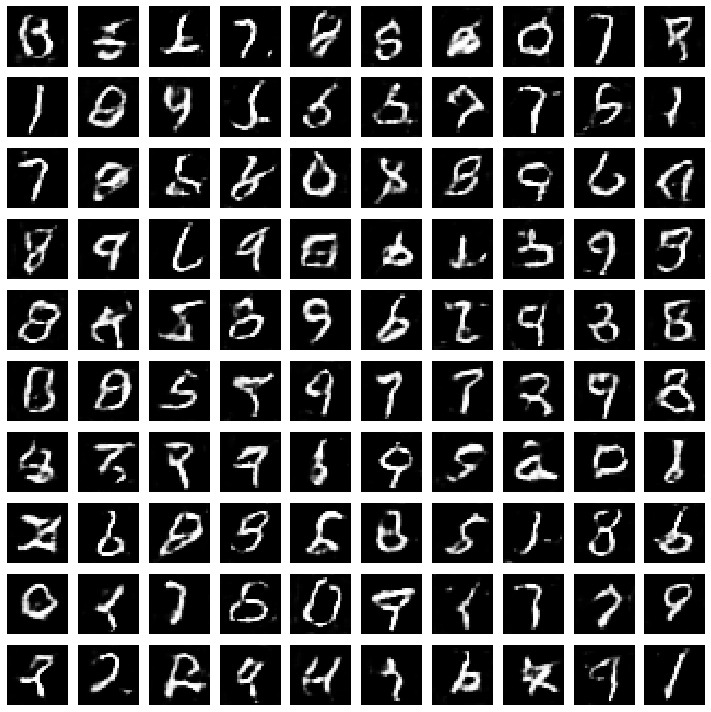

Epoch 36 Disc Loss 0.6440 Generator Loss 1.0642
Epoch 37 Disc Loss 0.6378 Generator Loss 1.1121
Epoch 38 Disc Loss 0.6315 Generator Loss 1.1341
Epoch 39 Disc Loss 0.7055 Generator Loss 1.2713
Epoch 40 Disc Loss 0.6271 Generator Loss 1.0700


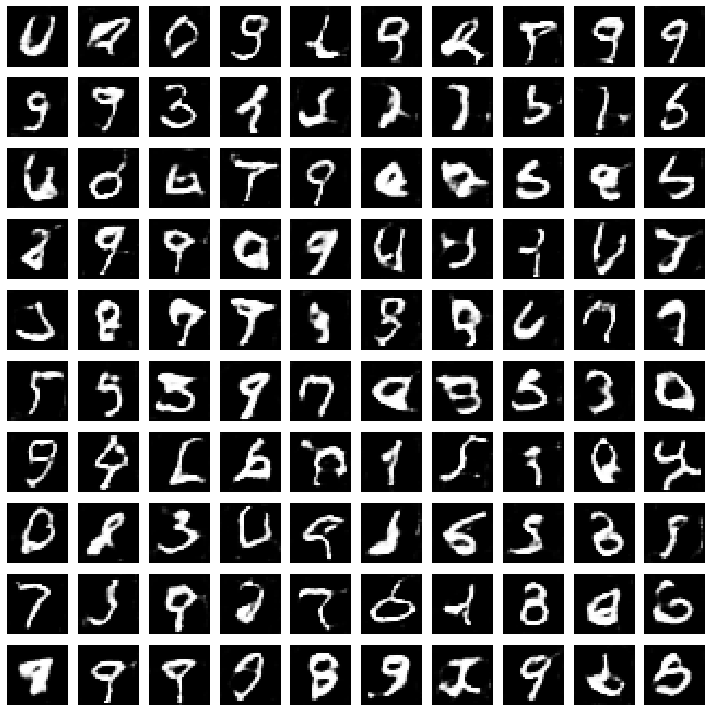

Epoch 41 Disc Loss 0.6267 Generator Loss 1.1700
Epoch 42 Disc Loss 0.6871 Generator Loss 1.1538
Epoch 43 Disc Loss 0.6278 Generator Loss 1.0812
Epoch 44 Disc Loss 0.6360 Generator Loss 1.1443
Epoch 45 Disc Loss 0.6356 Generator Loss 1.1319


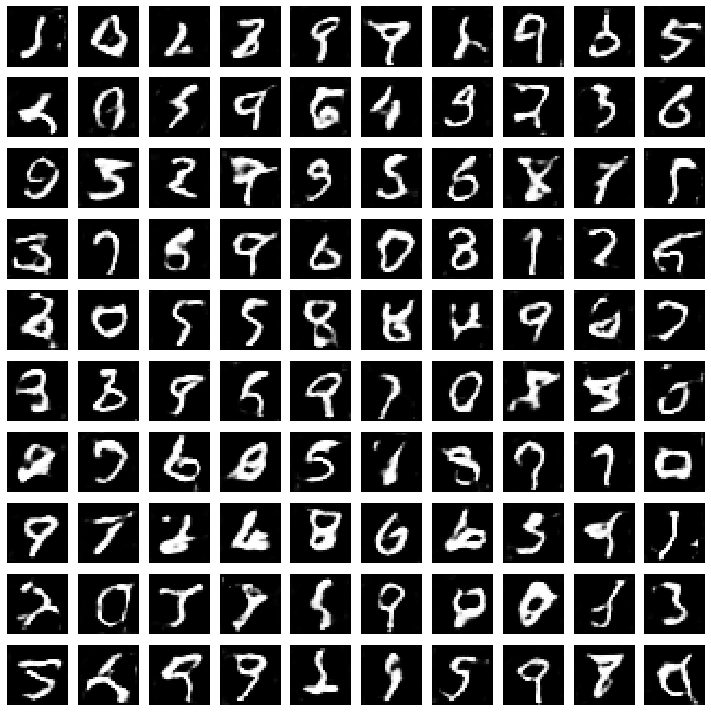

Epoch 46 Disc Loss 0.6688 Generator Loss 1.1229
Epoch 47 Disc Loss 0.6246 Generator Loss 1.1504
Epoch 48 Disc Loss 0.6831 Generator Loss 1.1255
Epoch 49 Disc Loss 0.6229 Generator Loss 1.1342
Epoch 50 Disc Loss 0.6703 Generator Loss 1.1754


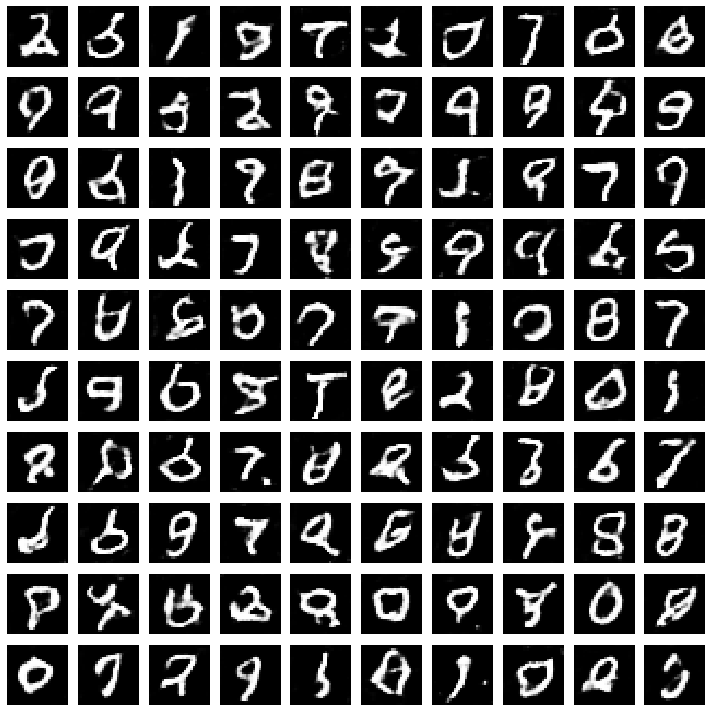

In [ ]:
### training two step process

d_losses = []
g_losses = []


for epoch in range(total_epoch):
  epoch_d_loss = 0.
  epoch_g_loss = 0.
  ### mini batch SGD
  for step in range(no_of_batches):
    ## train the discriminator
    ## 50% real data
    idx = np.random.randint(0,xtrain.shape[0],half_batch)
    real_img = xtrain[idx]

    ## 50% fake data
    noise = np.random.normal(0,1,size=(half_batch,noise_dim))
    fake_img = generator.predict(noise)


    ## labels
    real_y = np.ones((half_batch,1))*0.9 # real otput
    fake_y = np.zeros((half_batch,1))

    ## train our discriminator
    real_loss = discriminator.train_on_batch(real_img,real_y)
    fake_loss = discriminator.train_on_batch(fake_img,fake_y)
    d_loss = 0.5*real_loss+0.5*fake_loss
    #print("d_loss {}".format(d_loss))
    epoch_d_loss += d_loss

    ## train our generator
    noise = np.random.normal(0,1,size=(half_batch,noise_dim))
    ground_truth = np.ones((half_batch,1))

    g_loss = model.train_on_batch(noise,ground_truth)
    #print("g_loss {}".format(g_loss))
    epoch_g_loss += g_loss
  print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/no_of_batches,epoch_g_loss/no_of_batches))
  d_losses.append(epoch_d_loss/no_of_batches)
  g_losses.append(epoch_g_loss/no_of_batches)

  if (epoch+1)%5==0:
    generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
    save_imgs(epoch)

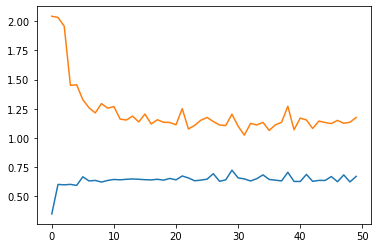

In [ ]:
plt.plot(np.array(d_losses))
plt.plot(np.array(g_losses))
plt.show()